# SI 618 - Homework #6: Machine Learning 1

Version 2021.03.21.2.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: linear regression,
machine learning pipeline, agglomerative clustering, k-means clustering, and t-SNE.

We will be using [graduate admissions data](https://www.kaggle.com/mohansacharya/graduate-admissions).

This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [35]:
MY_UNIQNAME = 'aarjun' # fill this in with your uniqname
# Do not modify the next three lines
import numpy as np
MY_UNIQHASH = hash(MY_UNIQNAME) & 2**32-1
np.random.seed(MY_UNIQHASH)
print(f"Random seed set to {MY_UNIQHASH}")

Random seed set to 2584375307


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm # colormaps
from sklearn.manifold import TSNE


In [37]:
admit = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/Admission_Predict.csv',
                    index_col="Serial No.")

In [38]:
admit.shape

(400, 8)

In [39]:
admit.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Task 1 (5 points):
Perform basic exploratory data analyses on the variables in this dataframe.  Your work should include both
numerical **and** graphical overviews of the data.  The `multiplePlots` code might be helpful here.

In [40]:
Stats = round(admit.describe(), 2)
Stats

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
max,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


From the table above, we can see that there are no missing values as the counts for all the columns is 400. The mean for GRE score and TOEFL score is 316.81 and 107.41 respectively. The average chance of admit is 0.72 and the 75% is around 0.83. 

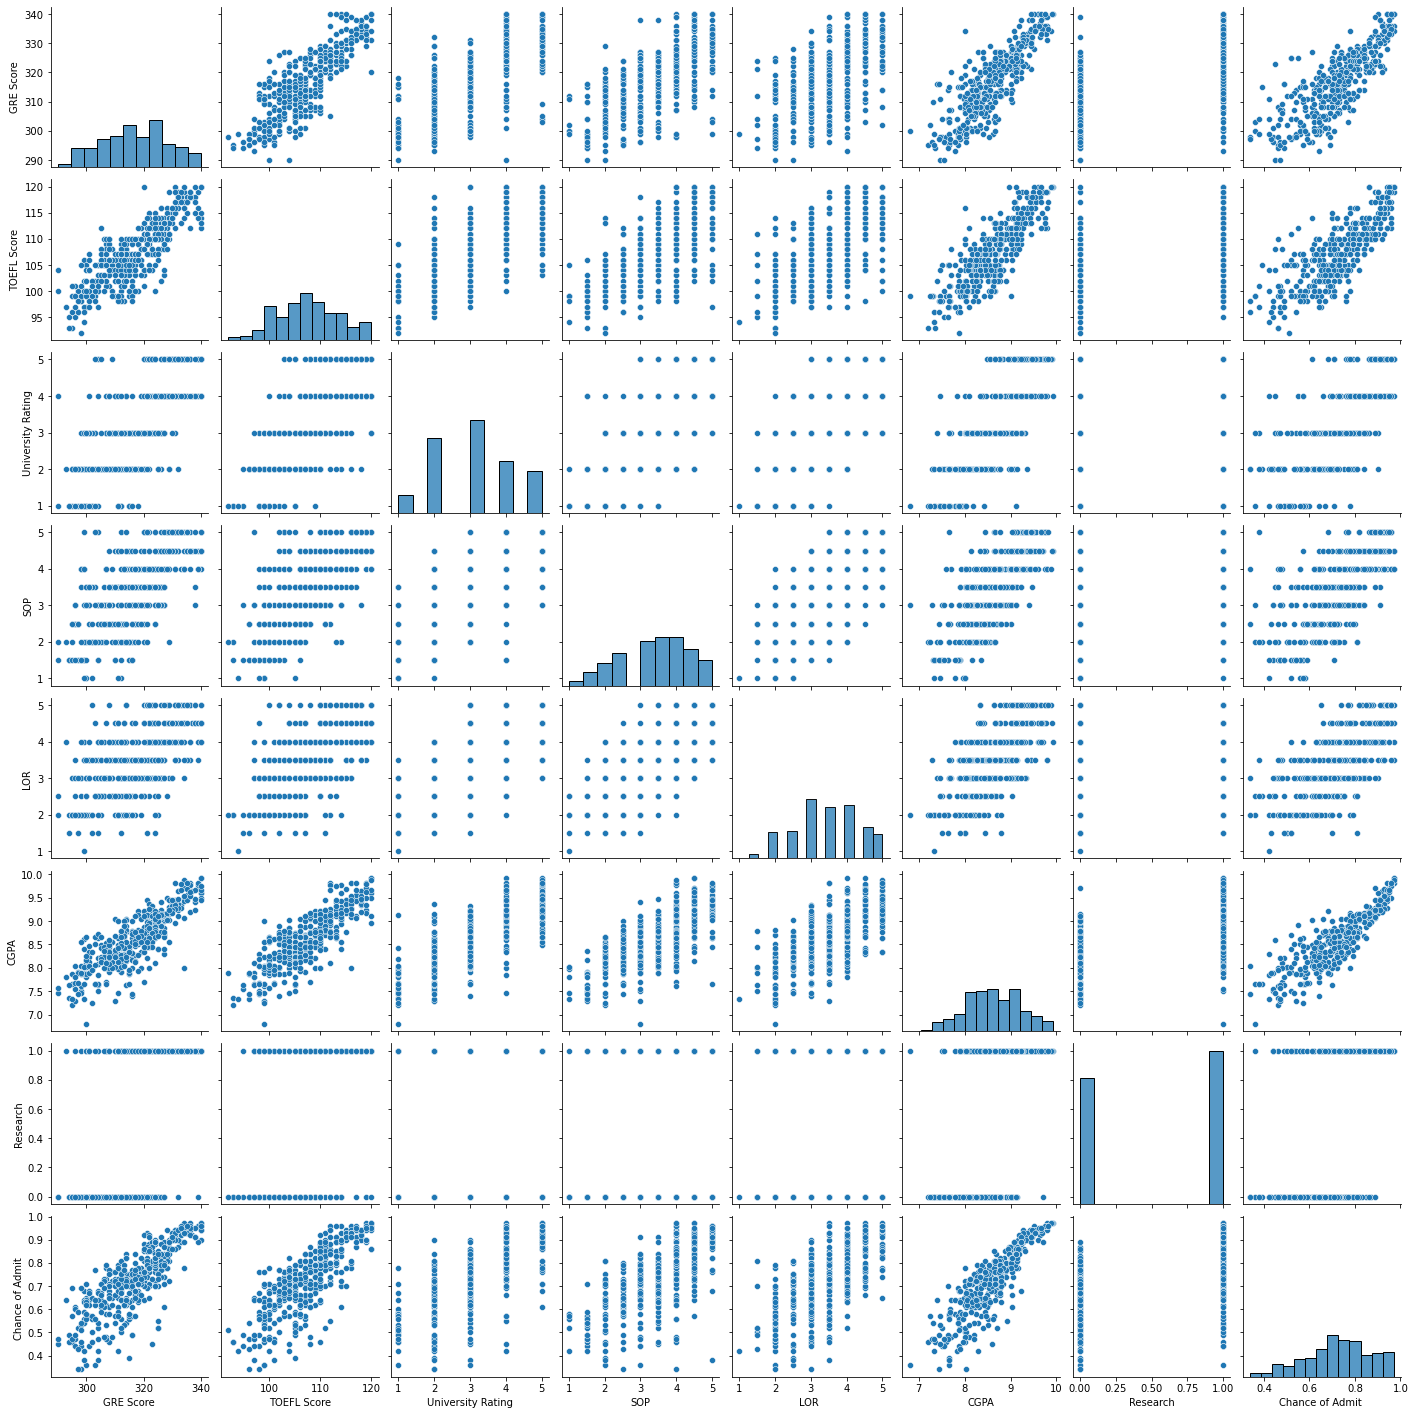

In [41]:
sns.pairplot(admit)

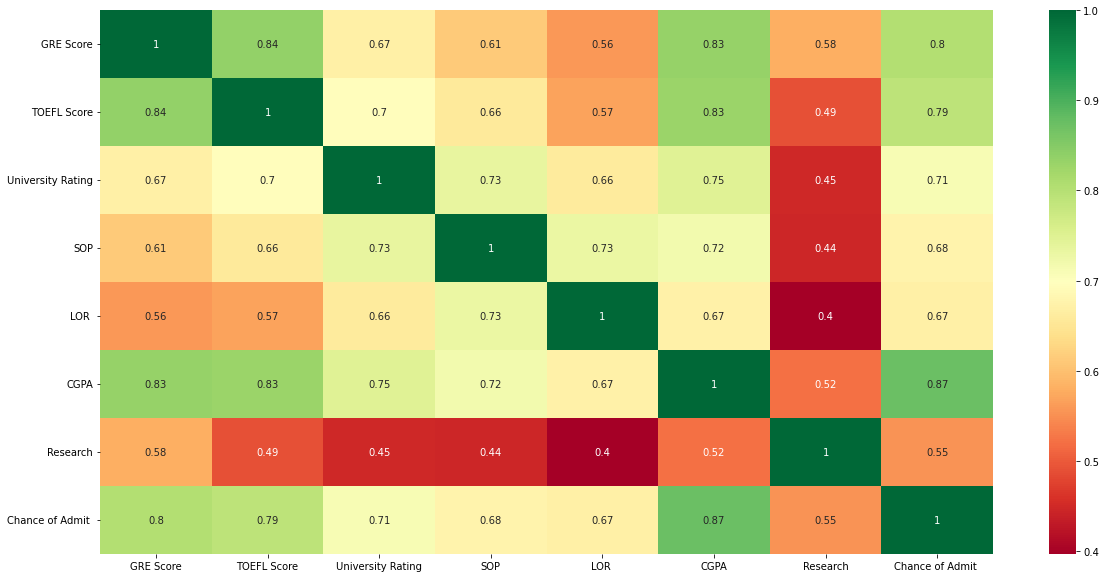

In [42]:
admit_corr = admit.corr()
plt.figure(figsize=(20,10))
g = sns.heatmap(admit_corr, annot=True,  cmap="RdYlGn")

From the pairplot above, we can observe that there is a strong relationship between GRE score and TOEFL score with Chance of admit. However, the students with research experience and students without research experience does not have much relationship with chance of admit. SOP, LOR and University ranking does not have much relationship with chance of admit. We can observe a few outliers in SOP and LOR. For instance, a SOP with a rating 5 has less chance of admit. Inorder to understand better, we should look at other variables (gre scores, TOEFL score, university ranking, LOR, research experience and CGPA)to understand if the candidate scored less in any of the other parameters. 

While analysing the heat map, we can see that there is a strong correlation between chance of admit and GRE score, TOEFL score and CGPA. 

Insert your code and answers here.

## Task 2a (15 points):
Use scikit-learn to conduct a linear regression that models the chance of admission based on the other variables.  Be sure to exclude "Serial No." as an explanatory variable.  Be sure to pre-process the data appropriately.  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.

In [43]:
#Instantiating the class Linear regression with a variable lm
lm = LinearRegression()
admit

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [44]:
#The column names of the admit columns are renamed for easy manipultation
admit.columns = ['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']
admit

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [45]:
#The columns are seperated into exploratory (X) and outcome variable (y)
X = (admit[['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research']])
y = (admit[['chance_of_admit']])


In [46]:
#The dataframe is split in to 80:20 training-test split. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)
y_test


,chance_of_admit
Serial No.,
235,0.91
43,0.53
304,0.73
156,0.77
343,0.58
...,...
180,0.73
203,0.97
324,0.62


In [47]:
model = lm.fit(X_train,y_train)

In [48]:
lm.score(X_train, y_train)

0.8094992790720147

In [49]:
lm.intercept_


array([-1.37105764])

In [50]:
y_pred_test = model.predict(X_test)

In [51]:
result = cross_validate(lm, X_test, y_test, scoring='neg_mean_squared_error')
print(f"The root mean squared error for test dataset is {np.sqrt(-np.mean((result['test_score'])))}")

The root mean squared error for test dataset is 0.0704009436835109


Insert your code and answers here.

## Task 2b (5 points):
Based on your work in the previous task, what is the probability of admission for someone with a GRE score or 325, a TOEFL score of 108, a university rating of 3, an statement of purpose score of 3.0, a letter of recommendation score of 3.5, a high-school grade point average of 8.9, and who has research experience.

In [52]:
x = np.array([325,108,3,3.0,3.5, 8.9, 1]).reshape(1,7)
pred = model.predict(x)
print(f"The chance  of admit for the given parameters is {round((pred[0][0]),2)}")

The chance  of admit for the given parameters is 0.79


Insert your code and answers here.

## Task 3 (5 points):
Decide on a reasonable value for a threshold for admission.  Pick a value that you would feel comfortable with if you wanted to know whether you were likely to be accepted into a graduate program.  Create a new variable called "admitted" that is set to 1 if the chance of admission value is equal to or greater than your chosen threshold, 0 otherwise.

In [53]:
admit['chance_of_admit'].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: chance_of_admit, dtype: float64

In [54]:
conditions = [
    (admit['chance_of_admit'] < 0.83),
    (admit['chance_of_admit'] >=  0.83)
     ]
values = [0, 1]

admit['admitted']= np.select(conditions, values)

University of Michigan, Ann Arbor has a 26% admission rate for its graduate course (https://www.usnews.com/best-colleges/university-of-michigan-ann-arbor-9092). Therefore, I will be using 75 percentile as a cutoff for admissions to the graduate course; i.e, 0.83. 

Insert your code and answers here.

## Task 4 (20 points):
Using a random sample of approximately 40 rows from the original dataset, conduct an agglomerative clustering analysis using average linkage based on PCA projections of the original data onto 2 dimensions (remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first two principal components. 

Do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.

Create a dendrogram, pick an appropriate "cut line" and comment on the composition of each of the resulting clusters.  Comment on the degree to which the clusters correspond to admission probabilities (note: you may find it helpful to examine the values of "admitted").

In [55]:
sampleData = admit.sample(n=40, random_state=123)
y = sampleData[sampleData.columns[-2]]
sampleData = sampleData[sampleData.columns[:-2]]
sampleData = sampleData.reset_index()
index = sampleData['Serial No.']
sampleData = sampleData.iloc[: , 1:]
y_new = y.reset_index()
y_new = y_new.iloc[:, 1:]

In [56]:
pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=123)),
    ('cluster', AgglomerativeClustering(n_clusters=2)),
])

In [57]:
y_pred = pipe.fit_predict(sampleData)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.75557989, 0.10110317])

In [59]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.8566830615816807

The first component explains 75.5% of the variance and second component explains 10.1% of the variance. The sum of the explained variance ration is 85.56%. This means that 85.56% of the variance is explained by the two PCA components after dimension reduction. 

In [60]:
df = pd.concat([index, y_new, pd.DataFrame(y_pred)],axis=1)
df

,Serial No.,chance_of_admit,0
0,235,0.91,1
1,43,0.53,0
2,304,0.73,1
3,156,0.77,0
4,343,0.58,0
5,310,0.70,0
6,55,0.70,0
7,288,0.89,1
8,379,0.56,0
9,92,0.38,0


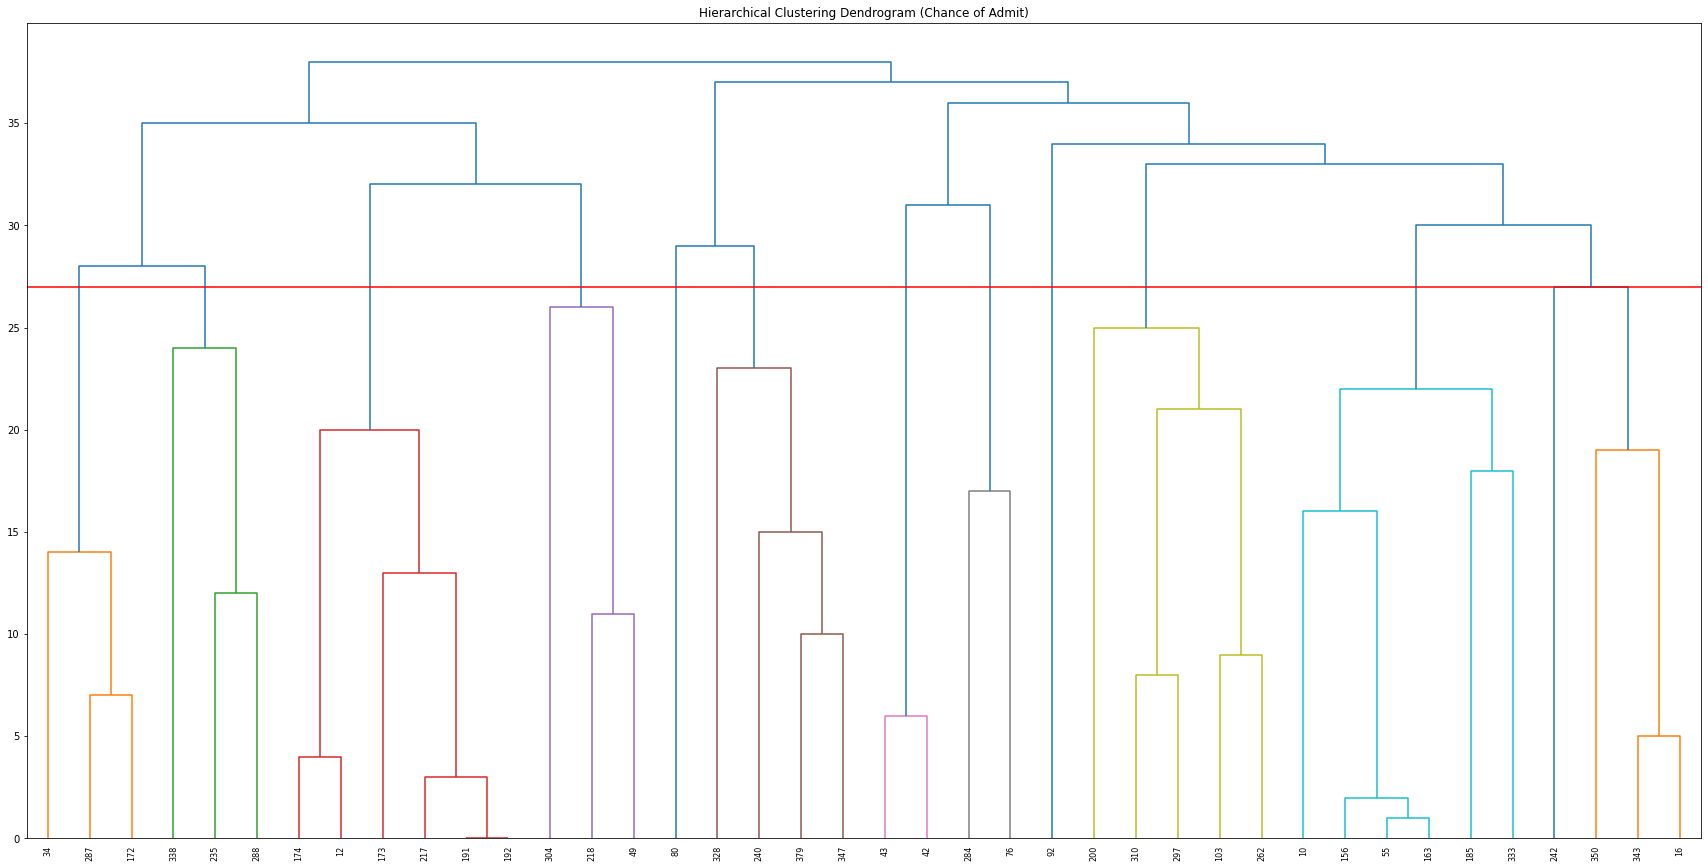

In [61]:
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    threshold = kwargs.pop('color_threshold')
    plt.axhline(threshold,color='red')

#model = AgglomerativeClustering(n_clusters=8)
#model = model.fit(music_nonames)
plt.figure(figsize=(30,15))
plt.title('Hierarchical Clustering Dendrogram (Chance of Admit)')

plot_dendrogram(pipe,labels= df['Serial No.'].values,color_threshold=27)
#plt.axhline(57.5,c='red')
plt.xticks(rotation=90)
plt.savefig('chance_of_admit.pdf')
plt.show()

I have chosen 25 as my threshold for "Cut line" to seperate three outliers ( Candidate 50, 92 and 242) from the clusters. 

In [62]:
admit.loc[[34, 35]]

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
34,340,114,5,4.0,4.0,9.6,1,0.90,1
35,331,112,5,4.0,5.0,9.8,1,0.94,1


Cluster 1 (Orange)

In [63]:
cluser_1 = admit.loc[[34,287,172]]
cluser_1

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
34,340,114,5,4.0,4.0,9.60,1,0.90,1
287,336,118,5,4.5,4.0,9.19,1,0.92,1
172,334,117,5,4.0,4.5,9.07,1,0.89,1


The candidates 340, 336 and 334 has very similar profile. The probabilty of admission for this cluster is 100% .


Cluster 2 (Green)

In [64]:
cluser_2 = admit.loc[[338,235,288]]
cluser_2

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
338,332,118,5,5.0,5.0,9.47,1,0.94,1
235,330,113,5,5.0,4.0,9.31,1,0.91,1
288,324,114,5,5.0,4.5,9.08,1,0.89,1


The candidates 338, 235 and 288 has very similar profile. The probabilty of admission for this cluster is 100% .

Cluster 3 (Red)


In [65]:
cluser_3 = admit.loc[[174,12,173, 217,191, 192]]
cluser_3

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
174,323,113,4,4.0,4.5,9.23,1,0.89,1
12,327,111,4,4.0,4.5,9.00,1,0.84,1
173,322,110,4,4.0,5.0,9.13,1,0.86,1
217,322,112,4,4.5,4.5,9.26,1,0.91,1
191,324,111,5,4.5,4.0,9.16,1,0.90,1
192,323,110,5,4.0,5.0,8.98,1,0.87,1


All the profiles have similar scores for all paramters. The candidate 191 and 192 has almost identical profiles. The probabilty of admission for this cluster is 100 %.

Cluster 4 (Violet)

In [66]:
cluser_4 = admit.loc[[304, 218, 49]]
cluser_4

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
304,323,107,3,3.5,3.5,8.55,1,0.73,0
218,321,109,4,4.0,4.0,9.13,1,0.85,1
49,321,110,3,3.5,5.0,8.85,1,0.82,0


The profiles fo the candidate 304, 218 and 49 are similar and differ in CGPA. The probabilty of admission for this cluster is 33.33% ( 1 has chance of admit out of 3). This clusters probabilty of admission is based on CGPA. 

Cluster 5 (Brown)

In [67]:
cluser_5 = admit.loc[[328, 240, 379, 347]]
cluser_5

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
328,295,101,2,2.5,2.0,7.86,0,0.69,0
240,299,100,1,1.5,2.0,7.89,0,0.59,0
379,303,98,1,2.0,2.5,7.65,0,0.56,0
347,304,97,2,1.5,2.0,7.64,0,0.47,0


The profiles of candidates 379 amd 347 are similar. All the profiles in this cluster have low scores. The probabilty of admission for this cluster is 0%.

Cluster 6 (Pink)

In [68]:
cluser_6 = admit.loc[[43, 42]]
cluser_6

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
43,313,107,2,2.5,2.0,8.5,1,0.53,0
42,316,105,2,2.5,2.5,8.2,1,0.49,0


The profiles of candidates 43 amd 42 are almost identical. All the profiles in this cluster have low scores. The probabilty of admission for this cluster is 0%.

Cluster 7 (Grey)

In [69]:
cluser_7 = admit.loc[[284, 76]]
cluser_7

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
284,321,111,3,2.5,3.0,8.90,1,0.80,0
76,329,114,2,2.0,4.0,8.56,1,0.72,0


The profiles of candidates 284 amd 76 are very similar in terms of GRE score, TOEFL score, university rating, SOP, LOR, CGPA and research experience. The probabilty of admission for this cluster is 0%.

Cluster 8(Yellow)

In [70]:
cluser_8 = admit.loc[[200, 310, 297, 103, 262]]
cluser_8

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
200,313,107,3,4.0,4.5,8.69,0,0.72,0
310,308,110,4,3.5,3.0,8.60,0,0.70,0
297,310,107,3,3.5,3.5,8.67,0,0.76,0
103,314,106,2,4.0,3.5,8.25,0,0.62,0
262,312,104,3,3.5,4.0,8.09,0,0.71,0


The profiles of candidates in this cluster are almost similar in terms of GRE score, TOEFL score, research experience, CGPA and LOR. The probabilty of admission for this cluster is 0%.

Cluster 9 (Light blue)

In [71]:
cluser_9 = admit.loc[[10, 156, 55, 163, 185, 333]]
cluser_9

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
10,323,108,3,3.5,3.0,8.60,0,0.45,0
156,312,109,3,3.0,3.0,8.69,0,0.77,0
55,322,110,3,3.0,3.5,8.00,0,0.70,0
163,318,109,3,3.0,3.0,8.50,0,0.67,0
185,316,106,2,2.5,4.0,8.32,0,0.72,0
333,308,106,3,3.5,2.5,8.21,1,0.75,0


The profiles of candidates in this cluster are almost similar in terms of TOEFL score, CGPA, SOP, University rating and LOR. They differ in terms of GRE scores and research experience (only candidate 333 has research experience). The probabilty of admission for this cluster is 0%.

Cluster 10 (orange)

In [72]:
cluser_10 = admit.loc[[350, 343, 16]]
cluser_10

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
Serial No.,,,,,,,,,
350,313,101,3,2.5,3.0,8.04,0,0.62,0
343,308,106,3,3.0,3.0,8.24,0,0.58,0
16,314,105,3,3.5,2.5,8.30,0,0.54,0


The profiles of candidates in this cluster are almost similar in terms of TOEFL score, CGPA, GRE scores, SOP, University rating and LOR. The probabilty of admission for this cluster is 0%.

## Task 5 (20 points):
Conduct a k-means clustering of the complete admissions data.  Pre-process the data using a 2-dimensional PCA (remember to scale your data before doing the PCA).  Again, do not use the chance of admission or the "admitted" variable you created earlier.  Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the optimal number of clusters.

In [73]:
pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('cluster', KMeans(n_clusters=2) ),
])

In [74]:
y = admit[sampleData.columns[-2]]
admit_new = admit[admit.columns[:-2]] 
admit_new = admit_new.reset_index()
admit_new = admit_new.iloc[: , 1:]
y = y.reset_index()
y = y.iloc[:, 1:]


In [75]:
X= admit_new.values

For n_clusters = 2 The average silhouette_score is : 0.5404161218383143
For n_clusters = 3 The average silhouette_score is : 0.5150179818766966
For n_clusters = 4 The average silhouette_score is : 0.41608344869523095
For n_clusters = 5 The average silhouette_score is : 0.460185324270415
For n_clusters = 6 The average silhouette_score is : 0.4437586427663824


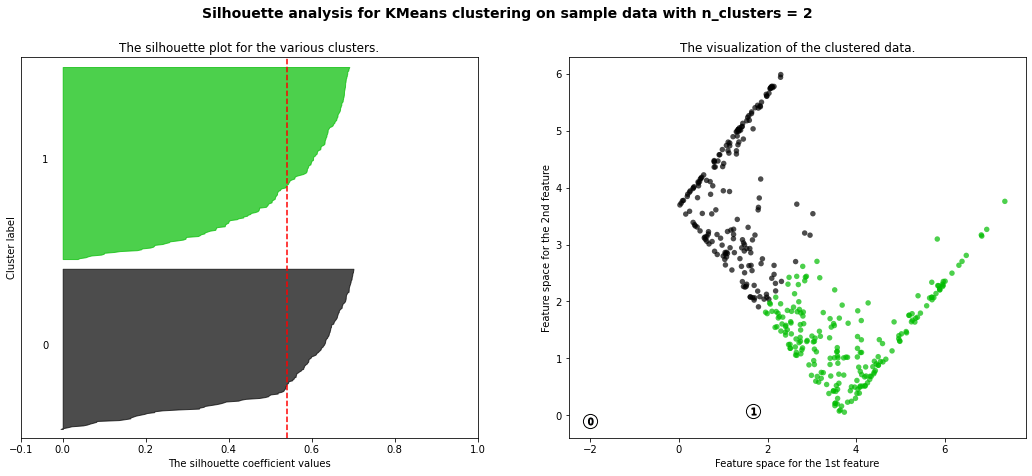

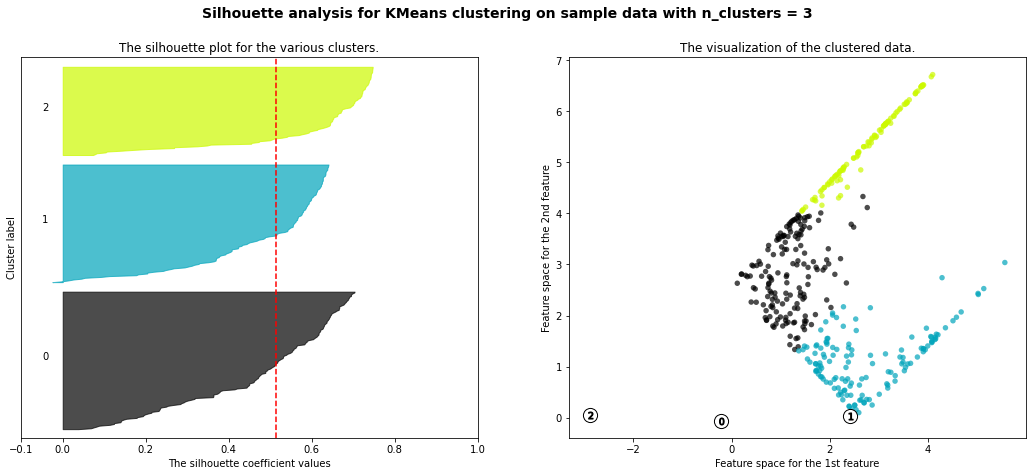

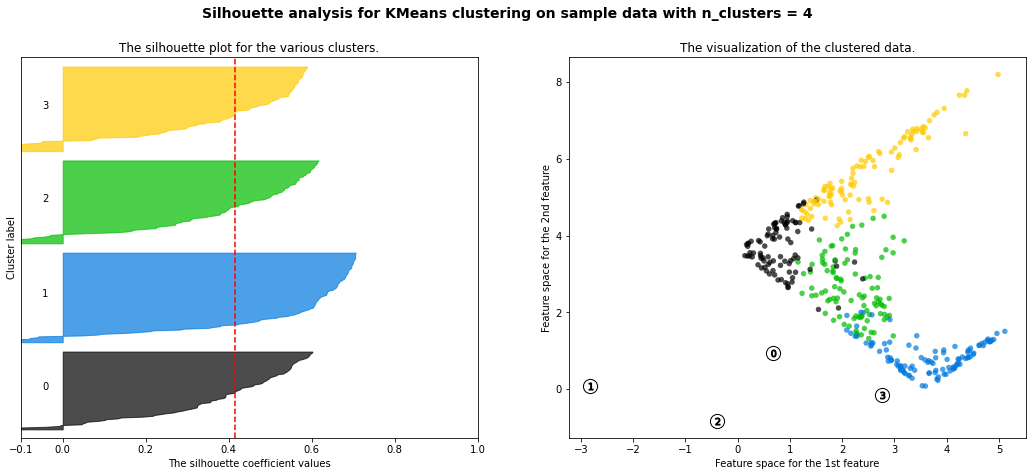

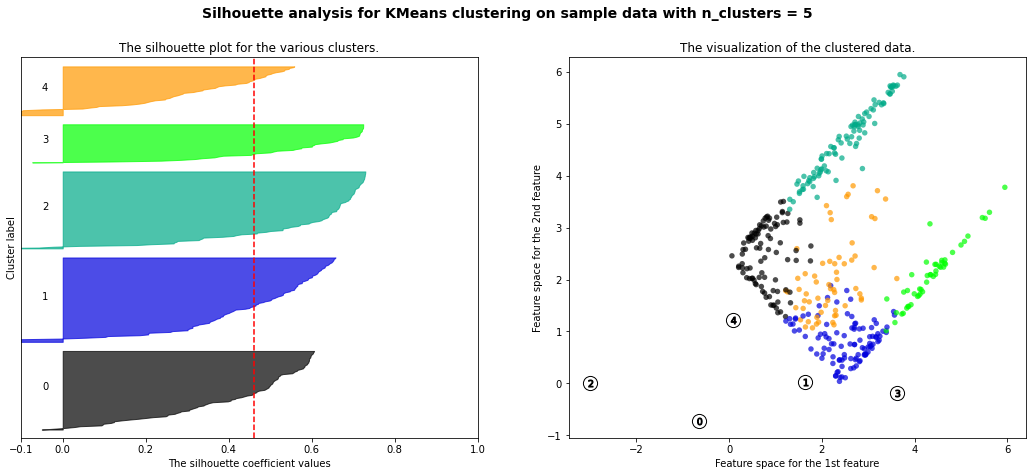

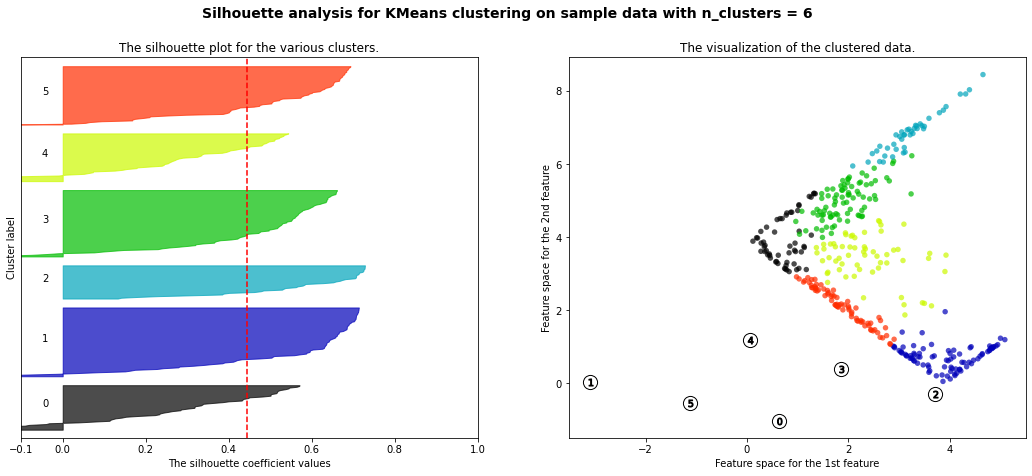

In [76]:
# based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    pipe = Pipeline([
        ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=42)),
        ('cluster', KMeans(n_clusters=n_clusters) ),
    ])
    cluster_labels = pipe.fit_predict(X)
    Xtransformed = pipe.transform(X)
    clusterer = pipe.named_steps.cluster

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The average silhouette_score is highest for Kmeans with 2 clsuters (0.5404161218383142). Therefore, 2 will be the optimal number of cluster. 

Insert your code and answers here.

## Task 6 (10 points):
Show the results of a t-SNE analysis of the complete admissions data.  As before, do not use the chance of admission column or the "admitted" variable you created in the previous step in your input data.  Color the points in your visualization based on the "admitted" variable you created earlier.

Insert your code and answers here.

In [77]:
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
X = admit_new.copy()
X_2d = tsne.fit_transform(X)
X_2d

array([[ 3.85517883e+01, -6.09271669e+00],
       [ 1.22263184e+01, -4.43931252e-01],
       [-3.85307002e+00, -1.86430633e+00],
       [ 1.13209190e+01, -4.31543779e+00],
       [-8.32650185e+00, -2.18227911e+00],
       [ 3.00010910e+01, -5.63465071e+00],
       [ 9.05938721e+00, -5.02926159e+00],
       [-1.87176609e+01,  2.01042342e+00],
       [-2.68005943e+01,  5.22380400e+00],
       [ 1.10194654e+01, -1.80501413e+00],
       [ 1.18090677e+01,  6.27184570e-01],
       [ 2.25021496e+01, -3.71902847e+00],
       [ 2.41228962e+01, -4.11511517e+00],
       [-1.62736340e+01,  9.92972755e+00],
       [-1.19425774e+01,  3.56166315e+00],
       [-5.55991459e+00,  8.72453868e-01],
       [ 3.57258886e-01, -1.59022784e+00],
       [ 2.62414479e+00, -4.09543961e-01],
       [ 4.76477194e+00, -5.82288885e+00],
       [-2.48064671e+01,  5.08736992e+00],
       [-8.54368877e+00,  4.95912123e+00],
       [ 2.07869911e+01, -8.42939281e+00],
       [ 2.88866234e+01, -7.14192629e+00],
       [ 3.

In [78]:
admit_y = admit[sampleData.columns[-1]].values

tsne_labelled = pd.concat([pd.DataFrame({'admitted':admit_y}),pd.DataFrame(X_2d,columns=['d1','d2'])],axis=1)


C:\Users\aarjun\AppData\Local\Temp/ipykernel_16704/4172476015.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20, c=palette[colors.astype(np.int)])


(<Figure size 2160x1080 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-13.749259, 2.828697, '0'), Text(15.684794, -4.7001863, '1')])

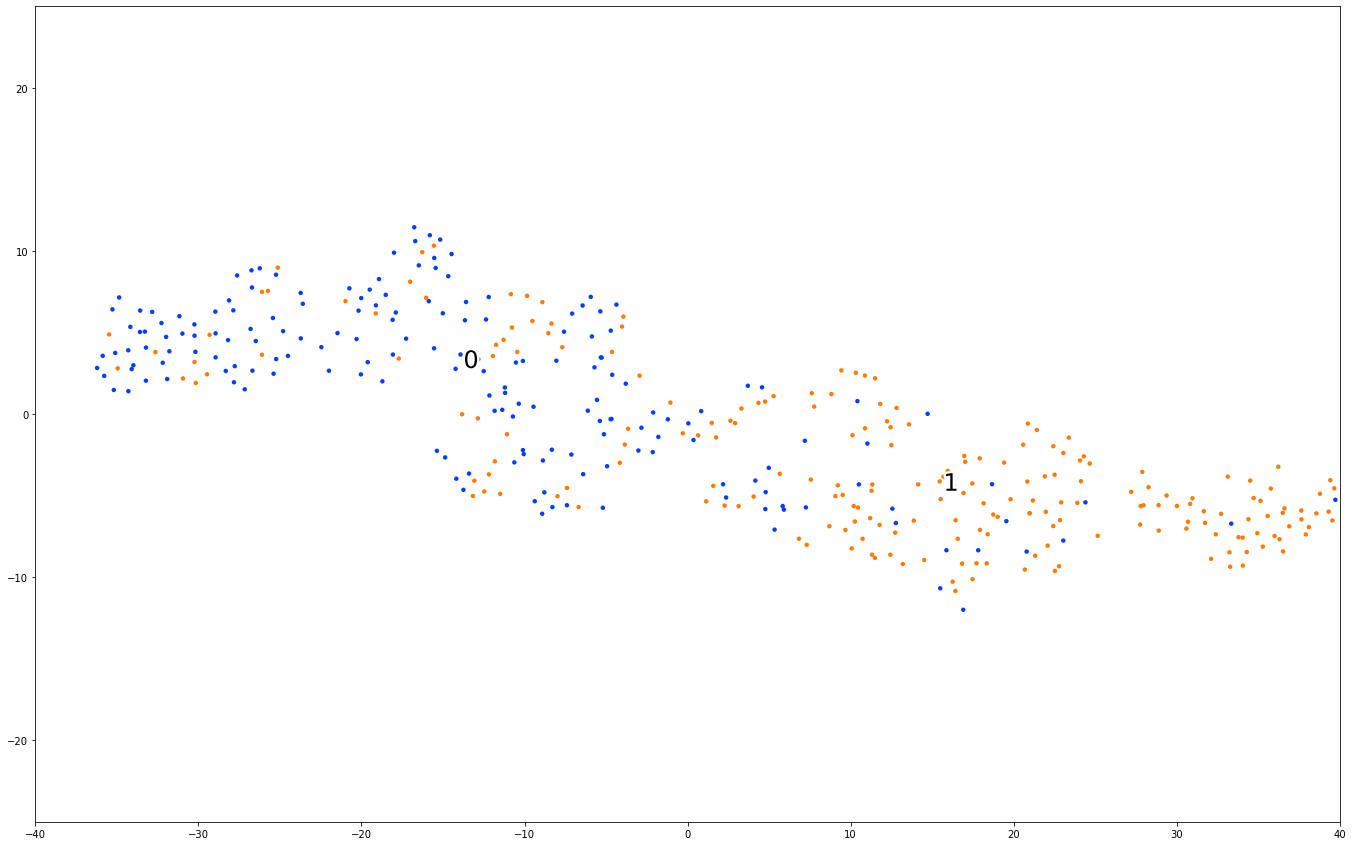

In [79]:
#from https://www.datacamp.com/community/tutorials/introduction-t-sne
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("bright", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(30, 15))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=20, c=palette[colors.astype(np.int)])
    plt.xlim(-40, 40)
    plt.ylim(-25, 25)


    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
fashion_scatter(X_2d, admit_y)

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.